# Data

In [79]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
import seaborn as sns
import sklearn

In [3]:
from sklearn.model_selection import train_test_split

from sklearn import metrics, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from xgboost import XGBClassifier

from collections import Counter

In [4]:
random_state=2022

In [5]:
metadata=pd.read_csv("data.csv")
metadata.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


In [6]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

移除patient id

In [7]:
drop_id=metadata.copy()
drop_id.drop(['Patient Id'], axis=1, inplace=True)
drop_id

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


將 column 都轉為小寫

In [8]:
drop_id.columns = [column.lower() for column in drop_id.columns]
drop_id

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


## Diagram

c:\Users\betty\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\betty\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


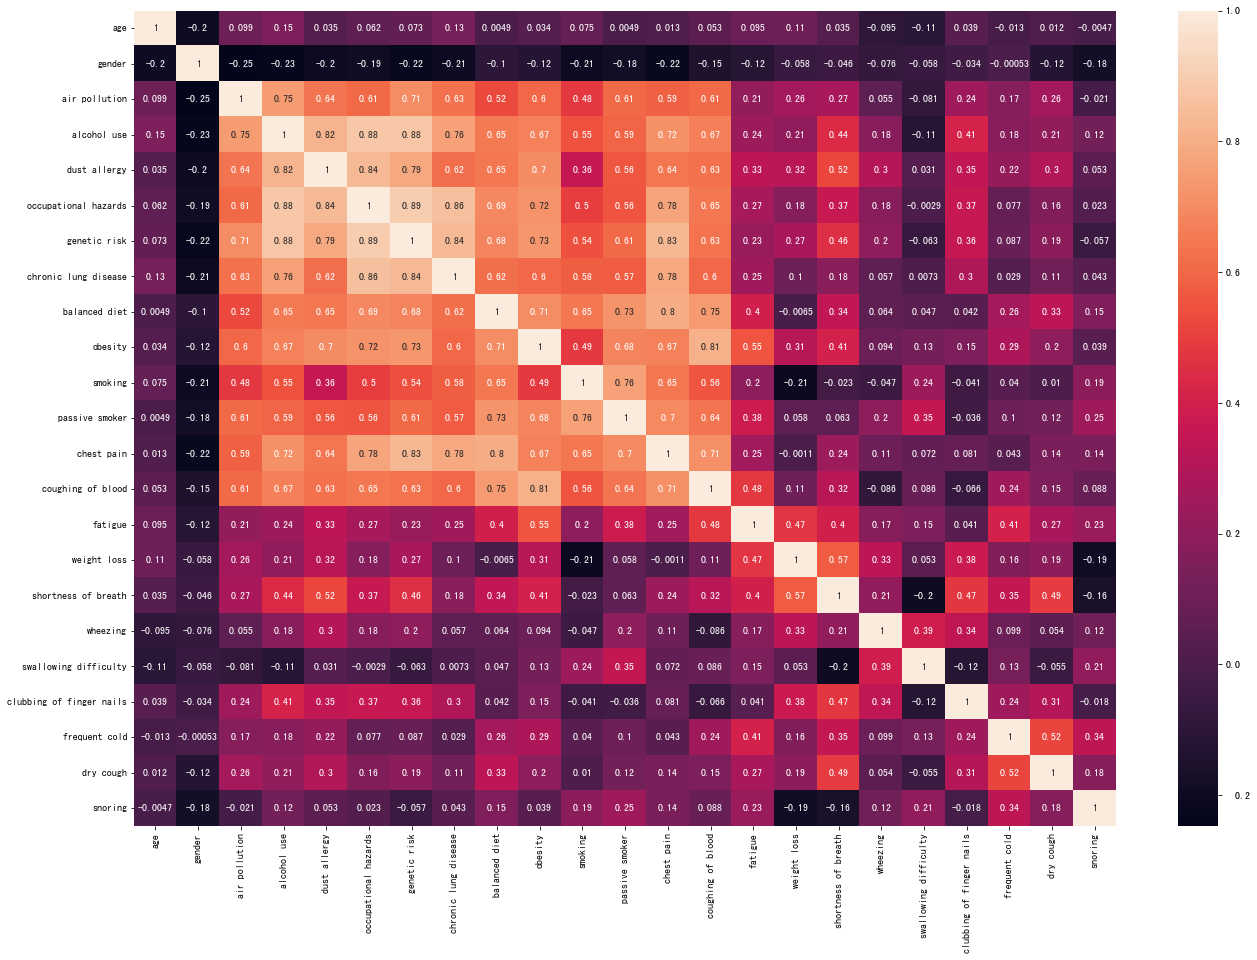

In [9]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(drop_id.corr(), annot=True)
plt.show()

各 level 的數量

<AxesSubplot:xlabel='level', ylabel='count'>

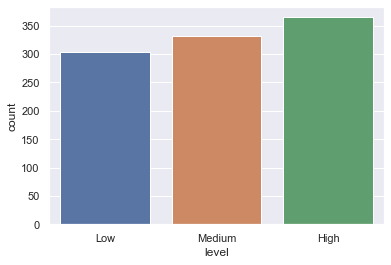

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(x="level", data=drop_id)

air pollution 數量分布，顏色為 level 

<AxesSubplot:xlabel='air pollution', ylabel='count'>

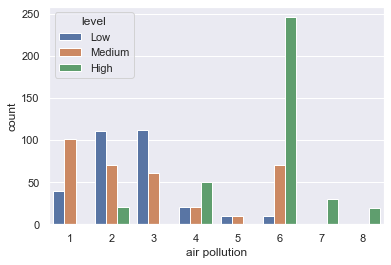

In [21]:
sns.countplot(x='air pollution', hue='level', data=drop_id)

# KMeans

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(drop_id)
data_le['level'] = labelencoder.fit_transform(data_le['level'])
data_le

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [12]:
silhouette_avg = []
inertia_list = []
for i in range(2,15):
    kmeans_fit = KMeans(n_clusters = i, init='k-means++', random_state=random_state).fit(drop_id)
    silhouette_avg.append(silhouette_score(drop_id, kmeans_fit.labels_))
    inertia_list.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

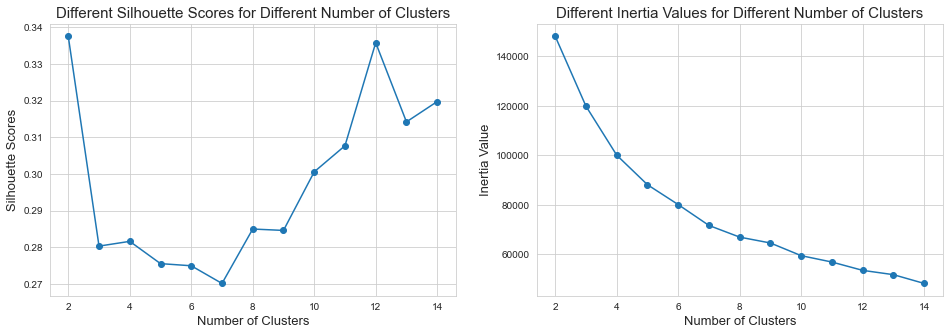

In [13]:
plt.rcParams['figure.figsize'] = [16,5]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.subplot(121)
plt.plot(range(2, 15), silhouette_avg)
plt.scatter(range(2, 15), silhouette_avg)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Silhouette Scores", size=13)
plt.title("Different Silhouette Scores for Different Number of Clusters", size=15)

plt.subplot(122)
plt.plot(range(2,15),inertia_list)
plt.scatter(range(2,15),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=15)

選定群數為 2

In [14]:
#Train the Model
kmeans_data=drop_id.copy()
kmeans = KMeans(n_clusters=2, init='k-means++',random_state=random_state).fit(kmeans_data)
kmeans_data['cluster'] = kmeans.labels_

In [15]:
kmeans.inertia_

148105.24303685938

In [86]:
kmeans_data[kmeans_data['cluster']==1].apply(pd.Series.value_counts)

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN
1,NaN,249.0,60.0,35.0,40.0,22.0,21.0,12.0,21.0,41.0,...,61.0,40.0,42.0,113.0,23.0,51.0,32.0,22.0,96.0,341.0
2,NaN,92.0,65.0,83.0,22.0,43.0,75.0,43.0,86.0,40.0,...,63.0,95.0,102.0,51.0,104.0,43.0,94.0,144.0,125.0,NaN
3,NaN,NaN,44.0,31.0,41.0,43.0,43.0,35.0,53.0,54.0,...,61.0,21.0,31.0,21.0,50.0,94.0,32.0,94.0,NaN,NaN
4,NaN,NaN,22.0,11.0,34.0,32.0,11.0,71.0,21.0,75.0,...,11.0,23.0,42.0,43.0,63.0,101.0,52.0,22.0,NaN,NaN
5,NaN,NaN,10.0,31.0,23.0,61.0,41.0,50.0,20.0,10.0,...,21.0,29.0,64.0,21.0,40.0,NaN,51.0,50.0,NaN,NaN
6,NaN,NaN,140.0,30.0,41.0,10.0,29.0,121.0,51.0,10.0,...,20.0,72.0,10.0,30.0,NaN,42.0,30.0,9.0,NaN,NaN
7,NaN,NaN,NaN,39.0,140.0,120.0,121.0,9.0,89.0,111.0,...,94.0,30.0,50.0,NaN,NaN,10.0,50.0,NaN,NaN,NaN
8,NaN,NaN,NaN,81.0,NaN,10.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,62.0,10.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31.0,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN


In [87]:
kmeans_data[kmeans_data['cluster']==0].apply(pd.Series.value_counts)

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,level,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,659.0
1,NaN,349.0,81.0,117.0,20.0,28.0,19.0,38.0,19.0,29.0,...,60.0,40.0,107.0,108.0,108.0,88.0,87.0,148.0,207.0,NaN
2,NaN,310.0,136.0,119.0,48.0,89.0,137.0,130.0,145.0,100.0,...,217.0,148.0,138.0,109.0,136.0,149.0,157.0,156.0,207.0,NaN
3,NaN,NaN,129.0,49.0,60.0,108.0,130.0,106.0,120.0,139.0,...,89.0,119.0,29.0,69.0,50.0,136.0,69.0,117.0,NaN,NaN
4,NaN,NaN,68.0,30.0,99.0,80.0,29.0,70.0,40.0,116.0,...,49.0,67.0,121.0,146.0,157.0,79.0,89.0,109.0,NaN,NaN
5,NaN,NaN,10.0,59.0,88.0,69.0,59.0,30.0,20.0,10.0,...,79.0,58.0,107.0,89.0,80.0,20.0,80.0,89.0,NaN,NaN
6,NaN,NaN,186.0,50.0,69.0,20.0,79.0,187.0,108.0,20.0,...,29.0,129.0,58.0,61.0,10.0,128.0,59.0,30.0,NaN,NaN
7,NaN,NaN,30.0,128.0,265.0,245.0,206.0,98.0,207.0,245.0,...,136.0,59.0,89.0,29.0,40.0,59.0,118.0,10.0,NaN,NaN
8,NaN,NaN,19.0,107.0,10.0,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,48.0,49.0,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,39.0,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN


## PCA

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_2D = pca.fit_transform(drop_id)
pca_final = pd.DataFrame(data_2D, columns=['X', 'Y'])
pca_final.head()

,X,Y
0,-4.430990,-5.286940
1,-20.664580,-4.539981
2,-1.797406,3.681554
3,0.334651,8.448772
4,9.297824,7.677500


### PCA + level

In [20]:
level=drop_id['level']
level

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: level, Length: 1000, dtype: int32

In [21]:
level_pred = [pca_final, level]
level_df = pd.concat(level_pred, axis=1)
level_df.head()

,X,Y,level
0,-4.430990,-5.286940,1
1,-20.664580,-4.539981,2
2,-1.797406,3.681554,0
3,0.334651,8.448772,0
4,9.297824,7.677500,0


<AxesSubplot:xlabel='X', ylabel='Y'>

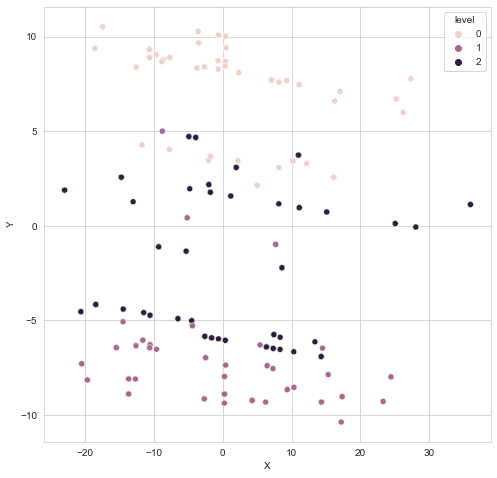

In [22]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='level', data=level_df)

### PCA + level + KMeans

In [23]:
kmeans_cluster=kmeans_data['cluster']
kmeans_cluster

0      0
1      0
2      0
3      0
4      1
      ..
995    1
996    0
997    0
998    0
999    1
Name: cluster, Length: 1000, dtype: int32

In [24]:
kmeans_pred = [level_df, kmeans_cluster]
kmeans_df = pd.concat(kmeans_pred, axis=1)
kmeans_df.head()

,X,Y,level,cluster
0,-4.430990,-5.286940,1,0
1,-20.664580,-4.539981,2,0
2,-1.797406,3.681554,0,0
3,0.334651,8.448772,0,0
4,9.297824,7.677500,0,1


<AxesSubplot:xlabel='X', ylabel='Y'>

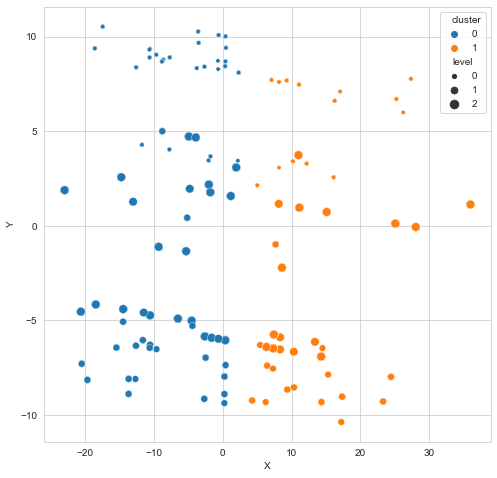

In [25]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='cluster', size=kmeans_df["level"],data=kmeans_df)

# Classification

## Data

In [26]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       1000 non-null   int64
 1   gender                    1000 non-null   int64
 2   air pollution             1000 non-null   int64
 3   alcohol use               1000 non-null   int64
 4   dust allergy              1000 non-null   int64
 5   occupational hazards      1000 non-null   int64
 6   genetic risk              1000 non-null   int64
 7   chronic lung disease      1000 non-null   int64
 8   balanced diet             1000 non-null   int64
 9   obesity                   1000 non-null   int64
 10  smoking                   1000 non-null   int64
 11  passive smoker            1000 non-null   int64
 12  chest pain                1000 non-null   int64
 13  coughing of blood         1000 non-null   int64
 14  fatigue                   1000 non-null  

In [27]:
y=data_le.level

features_all=['age', 'gender', 'air pollution', 'alcohol use', 
'dust allergy', 'occupational hazards', 'genetic risk', 'chronic lung disease',
'balanced diet', 'obesity', 'smoking', 'passive smoker', 'chest pain',
'coughing of blood', 'fatigue', 'weight loss', 'shortness of breath',
'wheezing', 'swallowing difficulty', 'clubbing of finger nails', 'frequent cold', 'dry cough', 'snoring']
X_all =data_le[features_all]

In [28]:
print(sorted(Counter(y).items()))

[(0, 365), (1, 303), (2, 332)]


## train_test_split

In [29]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=random_state)

In [30]:
X_test_all

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,coughing of blood,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring
652,28,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
579,33,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
836,38,1,2,3,5,2,1,1,1,1,...,4,2,1,3,4,6,1,3,2,2
586,42,1,2,4,5,6,5,5,4,6,...,3,8,7,7,3,8,9,1,6,2
226,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,39,1,4,5,6,6,5,4,6,6,...,6,5,3,2,4,3,1,7,5,6
924,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
609,38,2,5,2,3,1,2,3,5,2,...,3,1,1,1,1,1,3,2,4,2
516,38,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3


顏色代表第 i 群，大小代表 level

## Decision Tree

### model

In [31]:
# get the best parameters : max_leaf=5, min_samples=20，accuracy=0.987

def get_mae(max_leaf, min_samples, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes= max_leaf, min_samples_split = min_samples, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    accuracy = accuracy_score(val_y, preds_val)
    print(f"max_leaf = {max_leaf}, min_samples = {min_samples}, accuracy = {accuracy}")
    return(accuracy)

candidate_max_leaf_nodes = [2, 4, 5, 6, 8, 10, 12, 14, 16]
candidate_min_samples = [20, 30, 40]

for num in candidate_max_leaf_nodes:
    for num2 in candidate_min_samples:
        get_mae(num, num2, X_train_all, X_test_all, y_train_all, y_test_all)

max_leaf = 2, min_samples = 20, accuracy = 0.6
max_leaf = 2, min_samples = 30, accuracy = 0.6
max_leaf = 2, min_samples = 40, accuracy = 0.6
max_leaf = 4, min_samples = 20, accuracy = 0.9
max_leaf = 4, min_samples = 30, accuracy = 0.9
max_leaf = 4, min_samples = 40, accuracy = 0.9
max_leaf = 5, min_samples = 20, accuracy = 0.905
max_leaf = 5, min_samples = 30, accuracy = 0.905
max_leaf = 5, min_samples = 40, accuracy = 0.905
max_leaf = 6, min_samples = 20, accuracy = 0.95
max_leaf = 6, min_samples = 30, accuracy = 0.95
max_leaf = 6, min_samples = 40, accuracy = 0.95
max_leaf = 8, min_samples = 20, accuracy = 0.975
max_leaf = 8, min_samples = 30, accuracy = 0.975
max_leaf = 8, min_samples = 40, accuracy = 0.975
max_leaf = 10, min_samples = 20, accuracy = 1.0
max_leaf = 10, min_samples = 30, accuracy = 1.0
max_leaf = 10, min_samples = 40, accuracy = 1.0
max_leaf = 12, min_samples = 20, accuracy = 1.0
max_leaf = 12, min_samples = 30, accuracy = 1.0
max_leaf = 12, min_samples = 40, accurac

In [71]:
dt_all = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=10)
dt_all.fit(X_train_all, y_train_all)

DecisionTreeClassifier(max_leaf_nodes=10)

In [72]:
predicted_all = dt_all.predict(X_test_all)
predicted_prob_all = dt_all.predict_proba(X_test_all)

In [80]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

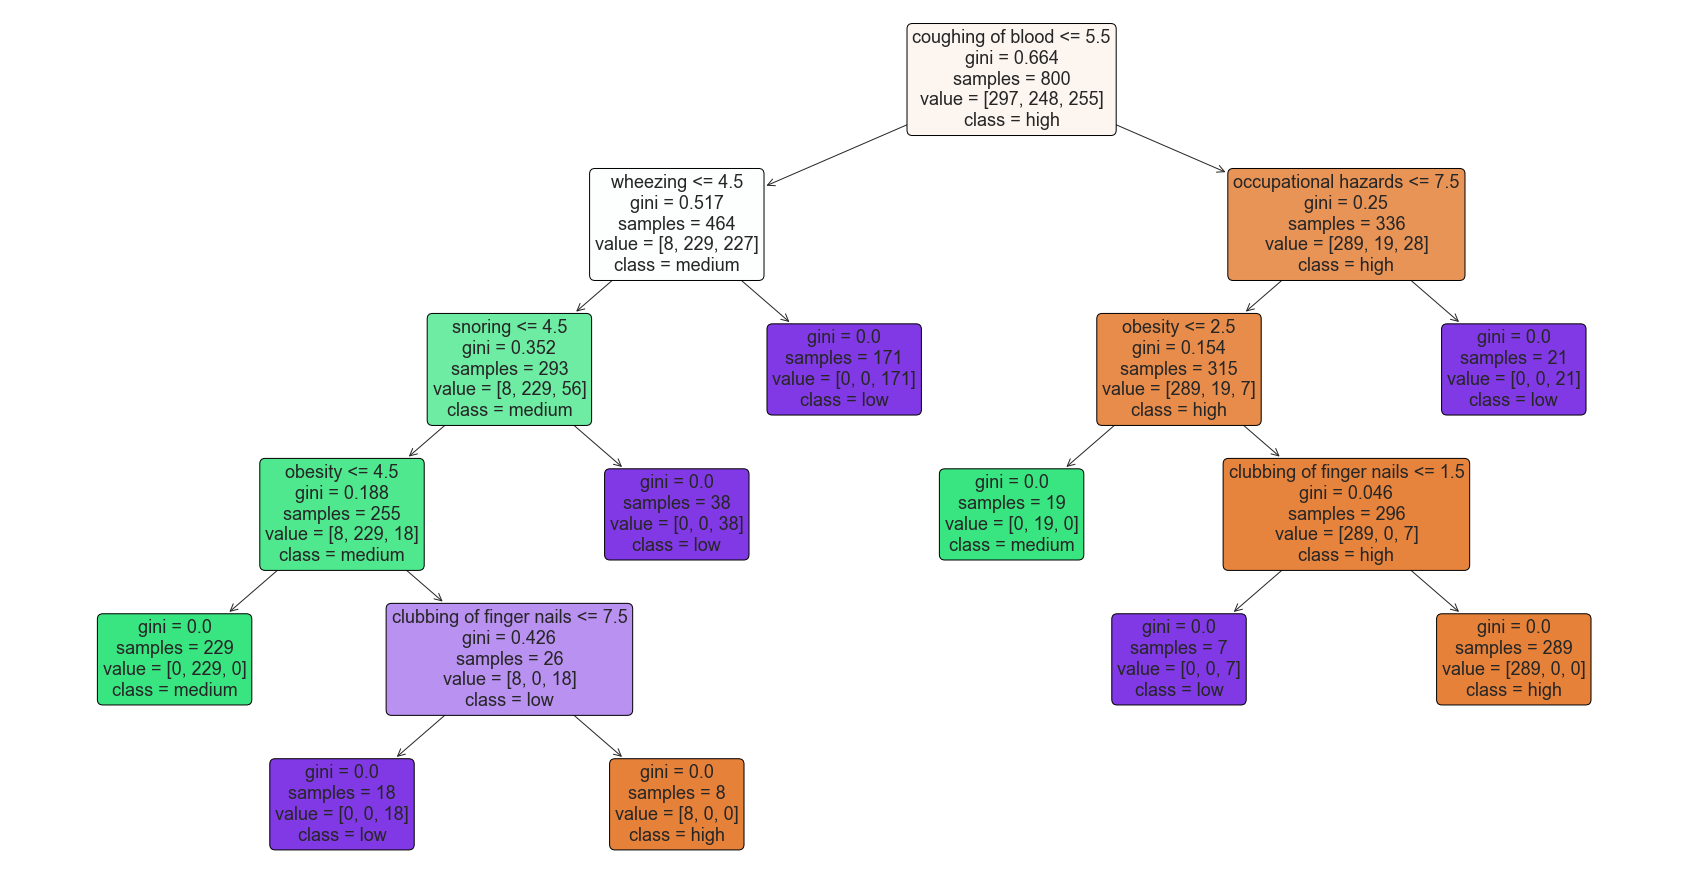

In [85]:
from matplotlib.colors import ListedColormap, to_rgb
class_name=['high', 'medium', 'low']
fig=plt.figure(figsize=(30, 16))
colors = ['lightcoral', 'orange', 'cornflowerblue']
# 'cornflowerblue'
cancer_tree= plot_tree(dt_all, 
          feature_names=features_all,
          class_names=class_name,
          rounded=True,
          fontsize=18,
          filled=True)

for artist, impurity, value in zip(cancer_tree, dt_all.tree_.impurity, dt_all.tree_.value):
    # let the max value decide the color; whiten the color depending on impurity (gini)
    # r, g, b = to_rgb(colors[np.argmax(value)])
    # f = impurity * 3/2 # for N colors: f = impurity * N/(N-1) if N>1 else 0
    # artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')


In [63]:
# Get numerical feature importances
importances = list(dt_all.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_all, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: coughing of blood    Importance: 0.43
Variable: wheezing             Importance: 0.2
Variable: obesity              Importance: 0.17
Variable: fatigue              Importance: 0.09
Variable: occupational hazards Importance: 0.07
Variable: clubbing of finger nails Importance: 0.04
Variable: age                  Importance: 0.0
Variable: gender               Importance: 0.0
Variable: air pollution        Importance: 0.0
Variable: alcohol use          Importance: 0.0
Variable: dust allergy         Importance: 0.0
Variable: genetic risk         Importance: 0.0
Variable: chronic lung disease Importance: 0.0
Variable: balanced diet        Importance: 0.0
Variable: smoking              Importance: 0.0
Variable: passive smoker       Importance: 0.0
Variable: chest pain           Importance: 0.0
Variable: weight loss          Importance: 0.0
Variable: shortness of breath  Importance: 0.0
Variable: swallowing difficulty Importance: 0.0
Variable: frequent cold        Importance: 0.0
Var

### Result

Accuracy: 1.0
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



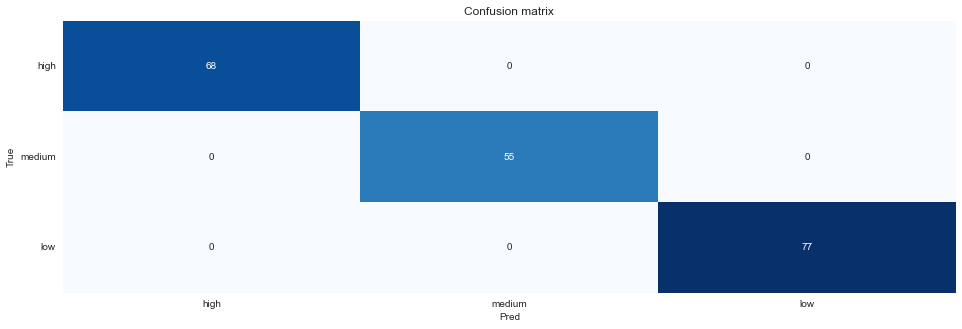

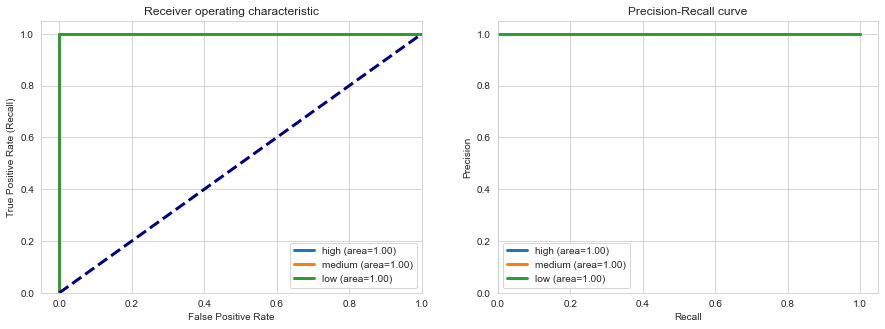

In [64]:
# classes = np.unique(y_test_all)
classes=['high', 'medium', 'low']
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

### 分錯(true, predicted, num)<br/>
(low, high, 3)<br/>
(high, low, 2)

In [44]:
result_dt=X_test_all.copy()
result_dt["cancer_level"]=y_test_all
result_dt

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,cancer_level
652,28,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
579,33,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,2
836,38,1,2,3,5,2,1,1,1,1,...,2,1,3,4,6,1,3,2,2,1
586,42,1,2,4,5,6,5,5,4,6,...,8,7,7,3,8,9,1,6,2,0
226,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,39,1,4,5,6,6,5,4,6,6,...,5,3,2,4,3,1,7,5,6,2
924,27,2,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,1
609,38,2,5,2,3,1,2,3,5,2,...,1,1,1,1,1,3,2,4,2,1
516,38,2,2,1,5,3,2,3,2,4,...,6,7,2,5,8,1,3,2,3,2


In [45]:
result_dt["dt_all"]=predicted_all
result_dt

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,cancer_level,dt_all
652,28,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,0,0
579,33,1,3,2,4,2,3,2,3,3,...,5,6,5,5,4,6,5,4,2,2
836,38,1,2,3,5,2,1,1,1,1,...,1,3,4,6,1,3,2,2,1,1
586,42,1,2,4,5,6,5,5,4,6,...,7,7,3,8,9,1,6,2,0,2
226,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,39,1,4,5,6,6,5,4,6,6,...,3,2,4,3,1,7,5,6,2,0
924,27,2,3,1,4,2,3,2,3,3,...,2,3,4,1,5,2,6,2,1,1
609,38,2,5,2,3,1,2,3,5,2,...,1,1,1,1,3,2,4,2,1,1
516,38,2,2,1,5,3,2,3,2,4,...,7,2,5,8,1,3,2,3,2,2


In [49]:
dt_all_lh=result_dt[(result_dt['cancer_level']==2) & (result_dt['dt_all']==0)]
dt_all_lh

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,cancer_level,dt_all
234,39,1,4,5,6,6,5,4,6,6,...,3,2,4,3,1,7,5,6,2,0
567,39,1,4,5,6,6,5,4,6,6,...,3,2,4,3,1,7,5,6,2,0
789,39,1,4,5,6,6,5,4,6,6,...,3,2,4,3,1,7,5,6,2,0


In [55]:
dt_all_lh[['coughing of blood', 'obesity', 'occupational hazards']]

,coughing of blood,obesity,occupational hazards
234,6,6,6
567,6,6,6
789,6,6,6


In [50]:
dt_all_hl=result_dt[(result_dt['cancer_level']==0) & (result_dt['dt_all']==2)]
dt_all_hl

,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,obesity,...,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,cancer_level,dt_all
586,42,1,2,4,5,6,5,5,4,6,...,7,7,3,8,9,1,6,2,0,2
697,42,1,2,4,5,6,5,5,4,6,...,7,7,3,8,9,1,6,2,0,2


In [54]:
dt_all_hl[['coughing of blood', 'wheezing', 'fatigue', 'obesity', 'occupational hazards']]

,coughing of blood,wheezing,fatigue,obesity,occupational hazards
586,3,3,8,6,6
697,3,3,8,6,6


## XGBoost

### Model

In [105]:
y_train_all.head(1)

420    0
Name: level, dtype: int32

In [91]:
xgb_all = XGBClassifier(learning_rate=0.1,
                      n_estimators=20,           # 树的个数-10棵树建立xgboost
                      max_depth=10,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=1,        # 解决样本个数不平衡的问题
                      random_state=42,           # 随机数
                      slient = 0
                    #   use_label_encoder=False,
                    #   eval_metric='mlogloss'
                      )
# xgb_all=XGBClassifier()
xgb_all.fit(X_train_all,y_train_all)

[11:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:53:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\betty\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, slient=0,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [100]:
y_train_pred = xgb_all.predict(X_train_all)
cm_train = confusion_matrix(y_train_all, y_train_pred)
cm_train

array([[297,   0,   0],
       [  0, 248,   0],
       [  0,   0, 255]], dtype=int64)

In [94]:
predicted_all = xgb_all.predict(X_test_all)
predicted_prob_all = xgb_all.predict_proba(X_test_all)

In [95]:
# Get numerical feature importances
importances = list(xgb_all.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_all, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: smoking              Importance: 0.1899999976158142
Variable: coughing of blood    Importance: 0.1899999976158142
Variable: fatigue              Importance: 0.1599999964237213
Variable: alcohol use          Importance: 0.10999999940395355
Variable: wheezing             Importance: 0.09000000357627869
Variable: genetic risk         Importance: 0.05999999865889549
Variable: frequent cold        Importance: 0.05000000074505806
Variable: dust allergy         Importance: 0.029999999329447746
Variable: passive smoker       Importance: 0.029999999329447746
Variable: clubbing of finger nails Importance: 0.029999999329447746
Variable: age                  Importance: 0.019999999552965164
Variable: air pollution        Importance: 0.019999999552965164
Variable: obesity              Importance: 0.009999999776482582
Variable: snoring              Importance: 0.009999999776482582
Variable: gender               Importance: 0.0
Variable: occupational hazards Importance: 0.0
Variable: chroni

### Result

|high|medium|low|
|-|-|-|
|0|1|2|

Accuracy: 1.0
Auc: 1.0
Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



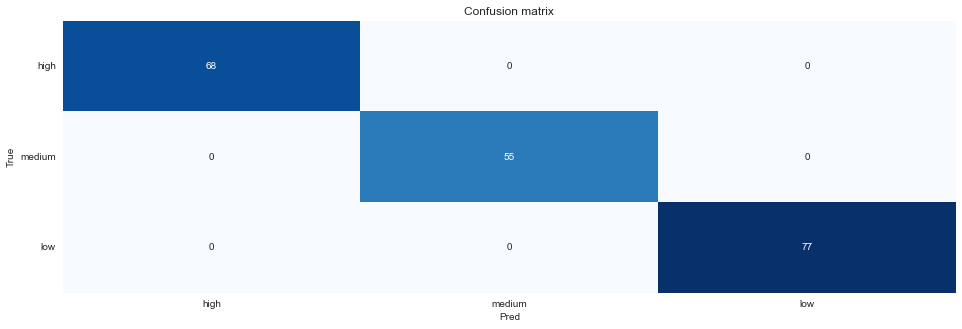

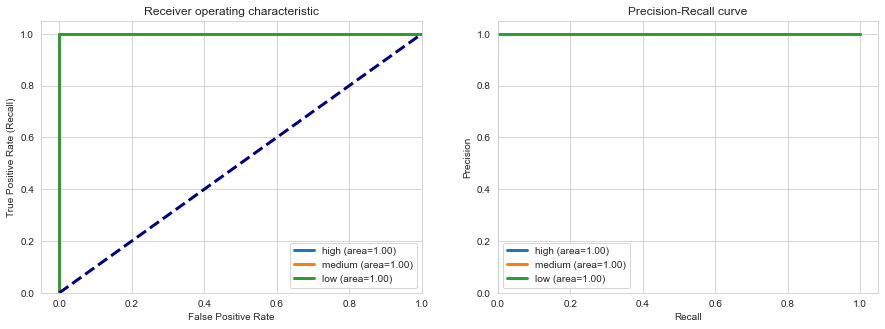

In [96]:
# classes = np.unique(y_test_all)
classes=['high', 'medium', 'low']
y_test_array = pd.get_dummies(y_test_all, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test_all, predicted_all)
auc = metrics.roc_auc_score(y_test_array, predicted_prob_all, 
                            multi_class="ovr")
f1=f1_score(y_test_all, predicted_all, average='weighted')
precision_all=precision_score(y_test_all, predicted_all, average='weighted')
recall_all=recall_score(y_test_all, predicted_all, average='weighted')
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test_all, predicted_all))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test_all, predicted_all)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

## Plot roc
roc_auc_dict = {}
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob_all[:,i])
    roc_auc = metrics.auc(fpr, tpr)
    ax[0].plot(fpr, tpr, lw=3, 
            #   label='{0} (area={1:0.2f})'.format(classes[i], 
            #                   metrics.auc(fpr, tpr))
                label='{0} (area={1:0.2f})'.format(classes[i], roc_auc)
               )
    roc_auc_dict[classes[i]] = {"fpr":fpr,"tpr": tpr, "roc_auc": roc_auc} 
    
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob_all[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()


# Store Model

In [97]:
import pickle
with open('./model/xgboost-lung_cancer.pickle', 'wb') as f:
    pickle.dump(xgb_all, f)

|high|medium|low|
|-|-|-|
|0|1|2|

|Age|Gender|Air Pollution|Alcohol use|Dust Allergy|OccuPationalHazards|Genetic Risk|chronic Lung Disease|Balanced Diet|Obesity|Smoking|Passive Smoker|Chest Pain|Coughing of Blood|Fatigue|Weight Loss|Shortness of Breath|Wheezing|Swallowing Difficulty|Clubbing of Finger Nails|Frequent Cold|Dry Cough|Snoring|Level|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|33|1|2|4|5|4|3|2|2|4|3|2|2|4|3|4|2|2|3|1|2|3|4|Low|


In [104]:
#讀取Model
with open('./model/xgboost-lung_cancer.pickle', 'rb') as f:
    xgboostModel = pickle.load(f)
    # pred=xgboostModel.predict(np.array([[33, 1, 2, 4, 5,
    #                                      4, 3, 2, 2, 4,
    #                                      3, 2, 2, 4, 3,
    #                                      4, 2, 2, 3, 1,
    #                                      2, 3, 4]]))
    pred=xgboostModel.predict(X_train_all.head(1))
    print(pred)

[0]
